## Clean and analyze covid19 dataset using Pandas

### Agenda for the session
 - Introduction to Pandas
 - Sourcing covid19 dataset from web source directly into Pandas dataframe
 - Cleaning and aggregating data as per our requirement
 - Visualize the number of cases for countries and relative number of deaths and recovered
 

### QuickStart Guide to Pandas (10 mins)

https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html#getting-started

### Covid19 dataset from Johns Hopkins CSSE

Dashboard link : https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6

Dataset link : https://github.com/CSSEGISandData/COVID-19

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-04-2020.csv')

In [77]:
## quick hack

from datetime import date, timedelta

today = date.today()
yesterday = today - timedelta(days=1)

d1 = yesterday.strftime("%m-%d-%Y")
print("Yesterdays Date =", d1)

file_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/' + d1 + '.csv'

df = pd.read_csv(file_url)

Yesterdays Date = 05-04-2020


In [78]:
# preview firt 5 records in the dataset
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-05-05 02:32:34,34.223334,-82.461707,33,0,0,33,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-05-05 02:32:34,30.295065,-92.414197,134,10,0,124,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-05-05 02:32:34,37.767072,-75.632346,425,6,0,419,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-05-05 02:32:34,43.452658,-116.241552,710,17,0,693,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-05-05 02:32:34,41.330756,-94.471059,1,0,0,1,"Adair, Iowa, US"


In [79]:
# preview last 5 records in the dataset
df.tail()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
3196,NaN,NaN,NaN,West Bank and Gaza,2020-05-05 02:32:34,31.952200,35.233200,362,2,102,258,West Bank and Gaza
3197,NaN,NaN,NaN,Western Sahara,2020-05-05 02:32:34,24.215500,-12.885800,6,0,5,1,Western Sahara
3198,NaN,NaN,NaN,Yemen,2020-05-05 02:32:34,15.552727,48.516388,12,2,1,9,Yemen
3199,NaN,NaN,NaN,Zambia,2020-05-05 02:32:34,-13.133897,27.849332,137,3,78,56,Zambia
3200,NaN,NaN,NaN,Zimbabwe,2020-05-05 02:32:34,-19.015438,29.154857,34,4,5,25,Zimbabwe


### Remove the columns that are not required

We do no need the following columns
 - FIPS
 - Admins2
 - Province_State
 - Last_Updated
 - Lat
 - Long_
 - Combined_Key

In [80]:
# list of all the columns and filter the data for only required columns

columns = list(df.columns)

req_columns = ['Country_Region','Confirmed','Deaths','Recovered','Active']

df_filtered = df[req_columns].copy()

# preview the first five records of the filtered dataset
df_filtered.head()

,Country_Region,Confirmed,Deaths,Recovered,Active
0,US,33,0,0,33
1,US,134,10,0,124
2,US,425,6,0,419
3,US,710,17,0,693
4,US,1,0,0,1


### Aggregate data as per the country

The data has province/state level data for some countries, we need to consolidate all the data such that there is one record for every contry.

We will use groupby method from Pandas library for the same. Refer to the documentation over [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)

In [81]:
df_consolidated = df_filtered.groupby(by='Country_Region').sum()
df_consolidated.head()


,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
Afghanistan,2894,90,397,2407
Albania,803,31,543,229
Algeria,4648,465,1998,2185
Andorra,750,45,499,206
Angola,35,2,11,22


In [82]:
# calculate the mortality rate
df_consolidated["Mortality Rate (per 100)"] = np.round(100*df_consolidated["Deaths"]/df_consolidated["Confirmed"],2)
df_consolidated.head()

,Confirmed,Deaths,Recovered,Active,Mortality Rate (per 100)
Country_Region,,,,,
Afghanistan,2894,90,397,2407,3.11
Albania,803,31,543,229,3.86
Algeria,4648,465,1998,2185,10.00
Andorra,750,45,499,206,6.00
Angola,35,2,11,22,5.71


In [104]:
# total confirmed along with contries
total_confirmed = df_consolidated['Confirmed'].sum()
print('Total confirmed cases World Wide: ',total_confirmed)

# sorted series by number of confirmed cases per country
sorted_confirmed = df_consolidated['Confirmed'].sort_values(ascending=False)
print(sorted_confirmed.head(10))


Total confirmed cases World Wide:  3583055
Country_Region
US                1180375
Spain              218011
Italy              211938
United Kingdom     191832
France             169583
Germany            166152
Russia             145268
Turkey             127659
Brazil             108620
Iran                98647
Name: Confirmed, dtype: int64


In [84]:
# total deaths along with contries
total_deaths = df_consolidated['Deaths'].sum()
print('Total deaths World Wide: ',total_deaths)

# sorted series by number of confirmed cases per country
sorted_deaths = df_consolidated['Deaths'].sort_values(ascending=False)
print(sorted_deaths.head(10))

Total deaths World Wide:  251537
Country_Region
US                68922
Italy             29079
United Kingdom    28809
Spain             25428
France            25204
Belgium            7924
Brazil             7367
Germany            6993
Iran               6277
Netherlands        5098
Name: Deaths, dtype: int64


In [85]:
# total recovered along with contries
total_recovered = df_consolidated['Recovered'].sum()
print('Total recovered World Wide: ',total_recovered)

# sorted series by number of confirmed cases per country
sorted_recovered = df_consolidated['Recovered'].sort_values(ascending=False)
print(sorted_recovered.head(10))

Total recovered World Wide:  1162724
Country_Region
US         187180
Germany    132700
Spain      121343
Italy       82879
Iran        79379
China       78792
Turkey      68166
France      51476
Brazil      45815
Canada      26030
Name: Recovered, dtype: int64


In [96]:
# countries with highest mortality rates

sorted_mortality = df_consolidated["Mortality Rate (per 100)"].sort_values(ascending=False)
print(sorted_mortality.head(20))

Country_Region
Nicaragua                33.33
MS Zaandam               22.22
Yemen                    16.67
Belgium                  15.76
United Kingdom           15.02
France                   14.86
Italy                    13.72
Bahamas                  13.25
Sao Tome and Principe    13.04
Mauritania               12.50
Netherlands              12.44
Sweden                   12.19
Antigua and Barbuda      12.00
Zimbabwe                 11.76
Spain                    11.66
Hungary                  11.57
Belize                   11.11
Haiti                    11.00
Liberia                  10.84
Suriname                 10.00
Name: Mortality Rate (per 100), dtype: float64


### Import the time series data

In [87]:
df_confirmed_ts = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_deaths_ts = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_recovered_ts = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [88]:
# preview the first five records of the dataset
df_confirmed_ts.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,712,726,736,750,766,773,782,789,795,803
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,738,738,743,743,743,745,745,747,748,750
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,25,26,27,27,27,27,30,35,35,35


In [89]:
# remove the columns representing the Latitude and longitude of the locations
df_confirmed_ts.drop(columns=['Lat','Long'],inplace=True)
df_deaths_ts.drop(columns=['Lat','Long'],inplace=True)
df_recovered_ts.drop(columns=['Lat','Long'],inplace=True)

In [90]:
# consolidate the data as per the country

df_confirmed_con = df_confirmed_ts.groupby(by='Country/Region').sum()
df_recovered_con = df_recovered_ts.groupby(by='Country/Region').sum()
df_death_con = df_deaths_ts.groupby(by='Country/Region').sum()

In [91]:
# transpose the dataframe for plotting
df_confirmed_con = df_confirmed_con.transpose()
df_recovered_con = df_recovered_con.transpose()
df_death_con = df_death_con.transpose()

## Plot the curve

<img src='https://assets.weforum.org/editor/F9EqAhZ_XqicwLxiJpPB4sLnnlbbAtrlnnnGWtARM1w.gif' height="500" width="500"></img>

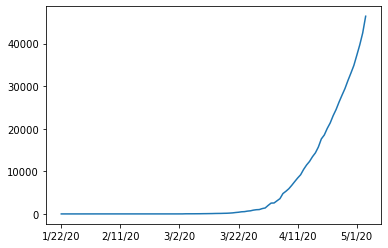

In [92]:
# plot the confirmed cases trend line
df_confirmed_con['India'].plot()

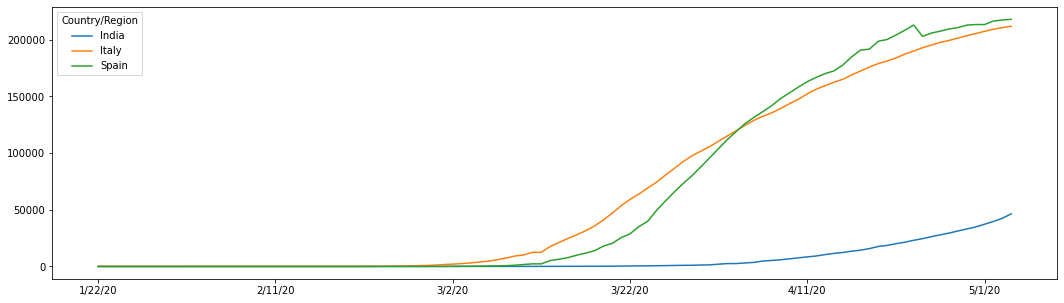

In [93]:
df_confirmed_con[['India','Italy','Spain']].plot(figsize=(18,5))

### Plot the daily cases in any contry
We will use Pandas time series functionality 

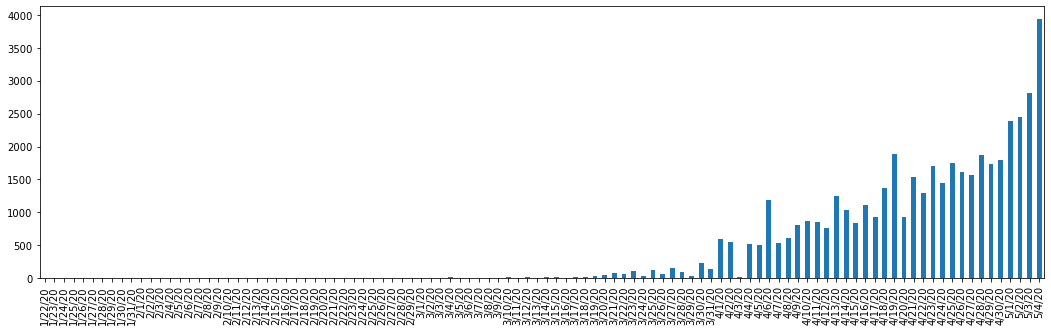

In [94]:
country = 'India'
t = df_confirmed_con[country] - df_confirmed_con[country].shift(1)
plt.figure(figsize=(18,5))
t.plot(kind = 'bar')